## LEGGERE: fare attenzione alle parti commentate di questo codice!!!
### il codice fa cose diverse a seconda delle celle che selezionate!!



In [4]:
from readability import Readability
import spacy
import nltk
import en_core_web_sm
nlp = en_core_web_sm.load()
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import re
import nltk
import csv
from collections import Counter
from readability import exceptions
from lexicalrichness import LexicalRichness

In [35]:


path= r"/Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI"


matrix=[]


output_file='text_analysis_readability_toworkwith.csv'
header=['Title','House', 'Decade', 'Year', 'Category', 'Flesch_Kincaid_score', 'Flesch_Kincaid_gl', 'flesch_score', 'flesch_reading_ease', 'flesch_gl', 'dale_chall_score', 'dale_chall_gl','ari_score', 'ari_gl', 'ari_ages', 'coleman_liau_score', 'coleman_liau_gl', 'smog_score', 'smog_gl', 'spache_score', 'spache_gl','linsear_write_score', 'linsear_write_gl', 'num_words', 'num_terms', 'rttr', 'cttr', 'mltd']


with open (output_file, 'w', encoding='utf-8', newline='\n') as output_handle:
    my_writer= csv.writer(output_handle, delimiter=';', quotechar='"')
    my_writer.writerow(header)

    for dirpath, dirnames, files in os.walk(path):
        print(f'Found directory: {dirpath}')
        for file in files:
            if file[0] == '.':
                continue
            with open(dirpath+ "/" + file, 'r', encoding='Latin-1') as f:
                try:
                    text=f.read()
                    r = Readability(text)

                    fk = r.flesch_kincaid()
                    Flesch_Kincaid_score = fk.score
                    Flesch_Kincaid_gl = fk.grade_level

                    f = r.flesch()
                    flesch_score =(f.score)
                    flesch_reading_ease=(f.ease)
                    for i in f.grade_levels:   
                        flesch_gl = str(i[0])

                    dc = r.dale_chall()
                    dale_chall_score =(dc.score)
                    for k in dc.grade_levels:
                        dale_chall_gl =str(k)

                    ari = r.ari()
                    ari_score =ari.score
                    for y in ari.grade_levels:
                        ari_gl =str(y)
                    for t in ari.ages:
                        ari_ages=str(t)

                    cl = r.coleman_liau()
                    coleman_liau_score = (cl.score)
                    coleman_liau_gl = (cl.grade_level)

                    s = r.smog(all_sentences=True)
                    smog_score =(s.score)
                    smog_gl = (s.grade_level)

                    s = r.spache()
                    spache_score = (s.score)
                    spache_gl =s.grade_level

                    lw = r.linsear_write()
                    linsear_write_score = (lw.score)
                    linsear_write_gl = (lw.grade_level)
                    
                    # lexical richness
                    
                    lex = LexicalRichness(text)
                    ttr=lex.ttr
                    num_words=lex.words
                    num_terms=lex.terms
                    rttr=lex.rttr
                    cttr=lex.cttr
                    mltd=lex.mtld(threshold=0.72)

                    print('file ok: {}'.format(dirpath + "/" + file))
                    for i in flesch_gl:
                        flesch_gl = str(i)


                    x=dirpath.split('/')
                    print(x)
                    decade=x[-1]

                    if x[8]== 'Disney':
                        house=x[8]
                        category=x[9]
                    else:
                        house=x[8]
                        category='Animation'
                    

                

                    s=file.split('.')
                    title=s[0]
                    year=s[1]

                    row=[title, house, decade, year, category, Flesch_Kincaid_score, Flesch_Kincaid_gl, flesch_score, flesch_reading_ease, flesch_gl, dale_chall_score, dale_chall_gl,
                                           ari_score, ari_gl, ari_ages, coleman_liau_score, coleman_liau_gl, smog_score, smog_gl, spache_score, spache_gl,
                                          linsear_write_score, linsear_write_gl, ttr, num_words, num_terms, rttr, cttr, mltd]
                                            
                                    
                    list_indices = [title, year, decade, house, category, Flesch_Kincaid_score, Flesch_Kincaid_gl, flesch_score, flesch_reading_ease, flesch_gl, dale_chall_score, dale_chall_gl,
                                           ari_score, ari_gl, ari_ages, coleman_liau_score, coleman_liau_gl, smog_score, smog_gl, spache_score, spache_gl,
                                          linsear_write_score, linsear_write_gl, num_words, num_terms, rttr, cttr, mltd]

                    matrix.append(list_indices)

                    my_writer.writerow(row)
                    
                except (exceptions.ReadabilityException):
                    print('\n\n\n!!!!!!File con problemi!!!!! {} \n\n\n'.format(title))
                    pass
                    




Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Blue
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Blue/2000
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Blue/2000/Ice Age Dawn of the Dinosaurs.2009.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Blue', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Blue/2000/Horton Hears a Who.2008.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Blue', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Blue/2000/Ice Age 2-The Meltdown.2006.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANA

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Universal/1990/The Land Before Time IV-Journey Through the Mists.1996.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Universal', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Universal/1990/The Land Before Time V-The Mysterious Island.1997.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Universal', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Universal/1990/The Land Before Time VI-The Secret of Saurus Rock.1998.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Universal', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Universal/1990/The Land Before Time II-The Great Valley Adventu

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Dreamworks/2010/Puss in Boots 3D.2011.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Dreamworks', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Dreamworks/2010/Rise of the Guardians.2012.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Dreamworks', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Dreamworks/2010/The Croods.2013.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Dreamworks', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Dreamworks/2010/Penguins Of Madagascar.2014.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', '

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/StudioGhibli/1990/Pom Poko.1994.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'StudioGhibli', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/StudioGhibli/1990/Princess Mononoke.1997.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'StudioGhibli', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/StudioGhibli/1990/The Ocean Waves.1993.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'StudioGhibli', '1990']
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Paramount
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Paramount/2010
file ok: /Users/val

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2000/Monsters Inc.2001.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2000/Meet the Robinsons.2007.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2000/The Emperors New Groove.2000.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2000/Finding Nemo.2003.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PR

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2010/Toy Story 3.2010.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2010/Monsters University.2013.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2010/Incredibles 2.2018.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/2010/Frozen.2013.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANAL

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/1990/The Hunchback of Notre Dame.1996.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/1990/A Bug's Life.1998.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/1990/Toy Story.1995.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Animation', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Animation/1990/Toy Story 2.1999.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTO

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1960/The Moon-Spinners.1964.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1960']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1960/The Love Bug.1968.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1960']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1960/Pollyanna.1960.txt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1960']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1960/Bon Voyage.1962.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGE

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1960/Multiply That Darn Cat.1965.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1960']
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1950
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1950/The Shaggy Dog.1959.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1950']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1950/Treasure Island.1950.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1950']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/A

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2000/The Chronicles Of Narnia-The Lion The Witch And The Wardrobe.2005.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2000/The Princess Diaries 2 Royal Engagement.2004.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2000/Eight Below.2006.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2000/The Lizz

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2010/Timmy Failure Mistakes Were Made.2020.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2010/A Wrinkle in Time.2018.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2010/Christopher Robin.2018.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '2010']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/2010/Pirates of the Caribbean 5 Salazar's Revenge.2017.sr

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1970/The Cat From Outer Space.1978.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1970']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1970/Shaggy DA.1976.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1970']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1970/No Deposit No Return.1976.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1970']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1970/Hot Lead And Cold Feet.1978.srt
['', 'Users', 'valeriaguttilla', 

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/The Big Green.1995.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/Heavyweights.1995.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/The Muppet Christmas Carol.1992.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/The Parent Trap.1998.srt
['', 'Users', 'valeriaguttilla', 'Desktop'

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/White Fang.1991.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/Iron Will.1994.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/D3 The Mighty Ducks.1996.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Disney', 'Live Action', '1990']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Disney/Live Action/1990/Operation Dumbo Drop.1995.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTE

file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Sony/2000/Surf's Up.2007.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Sony', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Sony/2000/Open Season.2006.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Sony', '2000']
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Sony/2000/Cloudy With A Chance Of Meatballs.2009.srt
['', 'Users', 'valeriaguttilla', 'Desktop', 'MASTER', 'PROGETTONE', 'ANALISI_TESTUALE', 'SOTTOTITOLI', 'Sony', '2000']
Found directory: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Sony/2010
file ok: /Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/SOTTOTITOLI/Sony/2010/Cloudy with a Chance of Meatballs 2.2013.srt
['', 'Users', 'valeria

In [36]:
# da fare solo se non si legge direttamente il csv, ma lo si è generato sopra
df = pd.DataFrame(np.array(matrix),
                   columns=['Title', 'Year','Decade','House','Category','Flesch_Kincaid_score', 'Flesch_Kincaid_gl', 'flesch_score', 'flesch_reading_ease', 'flesch_gl', 'dale_chall_score', 'dale_chall_gl',
                       'ari_score', 'ari_gl', 'ari_ages', 'coleman_liau_score', 'coleman_liau_gl', 'smog_score', 'smog_gl', 'spache_score', 'spache_gl',
                                     'linsear_write_score', 'linsear_write_gl', 'num_words', 'num_terms', 'rttr', 'cttr', 'mltd'])
df

,Title,Year,Decade,House,Category,Flesch_Kincaid_score,Flesch_Kincaid_gl,flesch_score,flesch_reading_ease,flesch_gl,...,smog_gl,spache_score,spache_gl,linsear_write_score,linsear_write_gl,num_words,num_terms,rttr,cttr,mltd
0,Ice Age Dawn of the Dinosaurs,2009,2000,Blue,Animation,1.0682431042014535,1,95.51394603049476,very_easy,5,...,6,4.204898855892834,4,1.576310861423221,2,5189,1035,14.368072622603833,10.159761584023952,70.09590082787484
1,Horton Hears a Who,2008,2000,Blue,Animation,1.6038131390908248,2,92.46157626337987,very_easy,5,...,6,4.500684453926887,5,1.9164411366711773,2,7424,1427,16.561702973665813,11.710892480676504,59.97479022934924
2,Ice Age 2-The Meltdown,2006,2000,Blue,Animation,1.1331306717734897,1,95.52277798952919,very_easy,5,...,6,3.990931913153014,4,1.7218934911242605,2,5240,1037,14.325609641584313,10.129735722195655,62.31714480009267
3,Ice Age,2002,2000,Blue,Animation,0.857777548033166,1,97.41357988650391,very_easy,5,...,6,4.080606565987409,4,1.665727170236753,2,4472,965,14.430335084879223,10.203787793312252,75.38871750621063
4,Epic,2013,2010,Blue,Animation,1.0792746771336397,1,96.9378101391431,very_easy,5,...,6,3.984298367475945,4,2.038975501113586,2,7689,1244,14.186832785245793,10.031605666006936,74.29000407878891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Goosebumps Haunted Halloween,2018,2010,Sony,Animation,1.2887396626617083,1,94.11088828575605,very_easy,5,...,6,4.350818307711618,4,1.6648768161718257,2,7630,1268,14.516335084056447,10.264598975912506,74.86868686868686
428,Hotel Transylvania 3 Summer Vacation,2018,2010,Sony,Animation,1.7075463333441832,2,91.61577256846046,very_easy,5,...,6,4.146189226803024,4,1.9167374681393374,2,6053,1132,14.54993623039659,10.288358574345262,60.40384685730285
429,The Smurfs 2,2013,2010,Sony,Animation,0.6455523032586221,1,99.19069436539557,very_easy,5,...,6,3.7959709280790666,4,1.7834467120181405,2,4546,770,11.420260475054054,8.075343624827424,48.957038951571484
430,Hotel Transylvania,2012,2010,Sony,Animation,1.2142194151190289,1,94.95983903336234,very_easy,5,...,6,4.0292073163689555,4,1.762561274509804,2,8150,1354,14.998224843835942,10.605346492836942,67.89627901704628


In [48]:
# leggendo solo il cvs generato in precedenza 
df=pd.read_csv('readability_valeria_lex_ric2.csv', delimiter=',', quotechar='"')

In [37]:
# ricodifico gli indici stringhe in numerici

# c stava per college e saltando il numero 9 ho convertito il 9 in 8 e il college in 9
df['flesch_gl'].replace(to_replace=['c', '9'], value=[9,8], inplace=True )

df['flesch_reading_ease'].replace(to_replace=['very_easy', 'easy', 'fairly_easy', 'very_confusing', 'standard'], 
                                       value=[0,1,2,4,3], inplace=True)

# K stava per kindergarden
df['ari_gl'].replace(to_replace='K', value=0, inplace=True)

df['dale_chall_gl'].replace(to_replace=['college', 'college_graduate'], value=[13,14], inplace=True)

In [38]:
for columns in df.columns:
    if columns not in ['Title', 'House', 'Category']:
        print (columns)
        df[columns] = pd.to_numeric(df[columns])

Year
Decade
Flesch_Kincaid_score
Flesch_Kincaid_gl
flesch_score
flesch_reading_ease
flesch_gl
dale_chall_score
dale_chall_gl
ari_score
ari_gl
ari_ages
coleman_liau_score
coleman_liau_gl
smog_score
smog_gl
spache_score
spache_gl
linsear_write_score
linsear_write_gl
num_words
num_terms
rttr
cttr
mltd


In [ ]:
# seleziono una casa di produzione se voglio

df_selected = df[df['House']=='DISNEY']
# nel caso Disney con più categorie
df_selected = df_selected[df_selected['Category']=='Live Action']
df_selected

In [39]:
# usare df al posto di df_selected se non si è applicato un filtro, ma si è selezionato tutto
# separo le colonne di grade_levels dagli score

grade_levels_df=df[['Title','Year','Decade','House','Category','Flesch_Kincaid_gl', 'flesch_gl', 'dale_chall_gl', 'spache_gl','ari_gl', 'coleman_liau_gl',  'smog_gl', 'linsear_write_gl']]
scores_df=df[['Title','Year','Decade', 'House','Category','Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score']]
lexical_r=df[['Title','Year','Decade','House','Category','num_words', 'num_terms', 'rttr', 'cttr', 'mltd']]

Analisi sugli score

In [ ]:
grade_levels_df

In [40]:
# normalizzazione (scaling)
min_max_scaler = MinMaxScaler()
scores_df[['Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score']] = min_max_scaler.fit_transform(scores_df[['Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score']])
scores_df

/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Title,Year,Decade,House,Category,Flesch_Kincaid_score,flesch_score,dale_chall_score,spache_score,ari_score,coleman_liau_score,smog_score,linsear_write_score
0,Ice Age Dawn of the Dinosaurs,2009,2000,Blue,Animation,0.260942,0.645334,0.105894,0.134395,0.421893,0.749268,0.279310,0.131736
1,Horton Hears a Who,2008,2000,Blue,Animation,0.307507,0.576629,0.189541,0.186205,0.425051,0.760387,0.366189,0.155590
2,Ice Age 2-The Meltdown,2006,2000,Blue,Animation,0.266583,0.645533,0.089133,0.096916,0.426646,0.758468,0.285396,0.141946
3,Ice Age,2002,2000,Blue,Animation,0.242643,0.688093,0.095904,0.112623,0.406044,0.742372,0.256562,0.138007
4,Epic,2013,2010,Blue,Animation,0.261901,0.677384,0.079021,0.095754,0.421754,0.763339,0.299190,0.164184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Goosebumps Haunted Halloween,2018,2010,Sony,Animation,0.280113,0.613753,0.142197,0.159954,0.400433,0.735739,0.310375,0.137948
428,Hotel Transylvania 3 Summer Vacation,2018,2010,Sony,Animation,0.316526,0.557591,0.120414,0.124111,0.437731,0.768780,0.387243,0.155611
429,The Smurfs 2,2013,2010,Sony,Animation,0.224191,0.728094,0.074150,0.062766,0.364406,0.714349,0.295010,0.146263
430,Hotel Transylvania,2012,2010,Sony,Animation,0.273634,0.632862,0.120254,0.103620,0.412512,0.748245,0.314952,0.144798


In [41]:
min_max_scaler = MinMaxScaler()
lexical_r[['num_words', 'num_terms', 'rttr', 'cttr', 'mltd']] = min_max_scaler.fit_transform(lexical_r[['num_words', 'num_terms', 'rttr', 'cttr', 'mltd']])

/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [42]:
# se si vuole ottenere un df con i grade_levels non normalizzati e gli score normalizzati

df_final= scores_df.merge(grade_levels_df, left_on=('Title', 'Year','Decade', 'House','Category'), right_on=('Title', 'Year', 'Decade', 'House', 'Category'), copy=False)
df_final = df_final.merge(lexical_r, left_on=('Title', 'Year','Decade', 'House','Category'), right_on=('Title', 'Year', 'Decade', 'House', 'Category'), copy=False)

In [47]:
# nel caso si voglia generare un csv 

df_final.to_csv('/Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/COMPLESSITA/readability_valeria_lex_ric2.csv')

In [ ]:
# NON USARE VERSIONE INIZIALE

scaler = MinMaxScaler()
scaled_scores = scaler.fit_transform(scores_df.iloc[:, 2:].values)
scaled_scores_df=pd.DataFrame(scaled_scores)
# unisco l'anno e il titolo
scaled_scores_df=scaled_scores_df.join(scores_df['Movie']).join(scores_df['Year'])
# riordino mettendo anno e titolo davanti
scaled_scores_df = scaled_scores_df.reindex(columns=['Movie','Year',0,1,2,3,4,5,6,7])
# rinomino le colonne con i nomi degli scores
scaled_scores_df= scaled_scores_df.rename(columns={0: "Flesch_Kincaid_score", 1: "flesch_score", 2: 'dale_chall_score',  3:'spache_score', 4: 'ari_score', 5: 'coleman_liau_score', 6: 'smog_score', 7: 'linsear_write_score'})

In [23]:
# raggruppo per anno oppure per decade, a seconda di quello che voglio vedere

mean_score = scores_df.groupby('Decade').mean()
#mean_score = scores_df.groupby('Year').mean()

mean_score

,Year,Flesch_Kincaid_score,flesch_score,dale_chall_score,spache_score,ari_score,coleman_liau_score,smog_score,linsear_write_score
Decade,,,,,,,,,
1940,1943.250000,0.414219,0.483811,0.157590,0.234955,0.531063,0.830346,0.455793,0.265946
1950,1955.000000,0.328703,0.594811,0.099059,0.145791,0.474894,0.803454,0.350133,0.207027
1960,1963.825000,0.344412,0.570127,0.114567,0.155999,0.476284,0.802803,0.396636,0.215891
1970,1975.037037,0.314912,0.588348,0.107416,0.138035,0.460608,0.792603,0.364217,0.178874
1980,1984.321429,0.346090,0.579713,0.124402,0.171522,0.475833,0.783233,0.383552,0.232748
1990,1995.139241,0.304767,0.608477,0.146071,0.175091,0.437923,0.771225,0.348634,0.179156
2000,2004.239583,0.302661,0.614992,0.124876,0.150847,0.441400,0.770150,0.343980,0.182184
2010,2014.562044,0.296904,0.615099,0.121649,0.138230,0.436369,0.764546,0.340598,0.170968


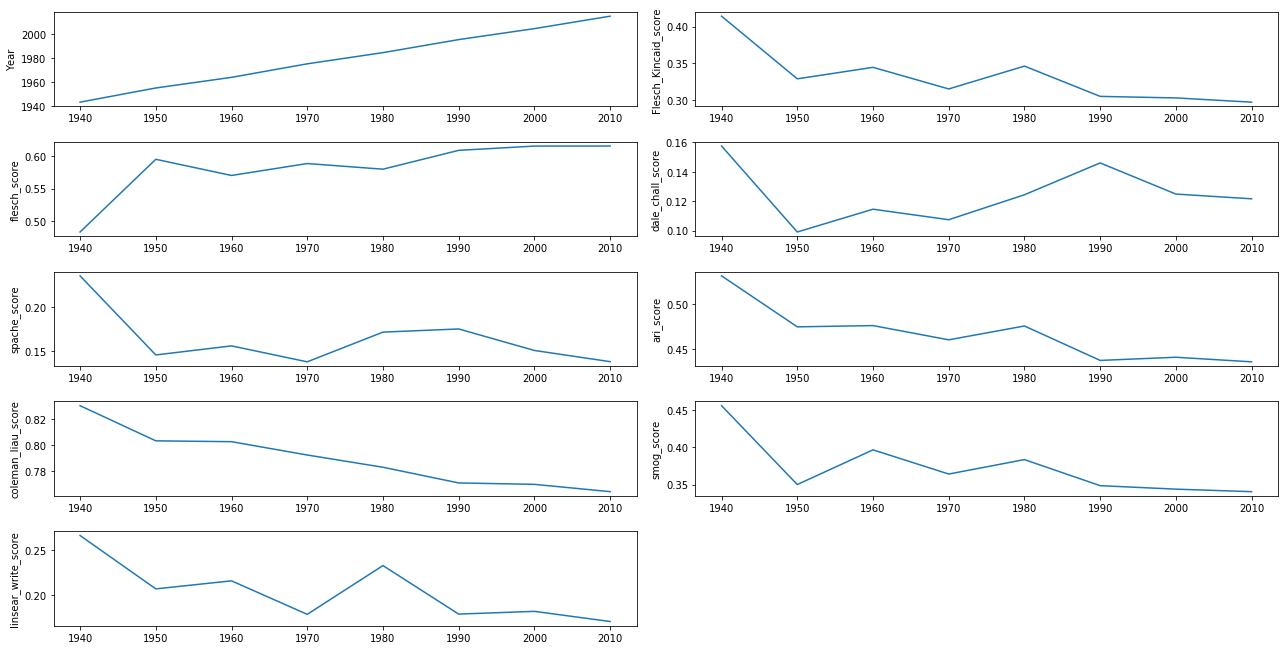

In [24]:
# plot degli score 

plt.figure(figsize=(18, 18)) 
# selezionare le dimensioni a seconda di quanti grafici si hanno
fig_dims = (10, 2)
i = 0
j = 0
for c in mean_score:
    plt.subplot2grid(fig_dims, (i, j))
    plt.plot(mean_score[(str(c))])
    plt.ylabel(str(c))

        # j deve essere il numero delle dimensioni fig_dims(x,y) di y-1 
    if (j < 1):
        j += 1
    else:
        j = 0
        i += 1
        

plt.tight_layout()
plt.show()
plt.rcParams['font.size'] = 10



Analisi grade levels

In [25]:
# raggruppo per anno o per decade (come fatto per gli scores)

#grade_levels_df= grade_levels_df.groupby('Year').mean()
grade_levels_df= grade_levels_df.groupby('Decade').mean()
grade_levels_df

,Year,Flesch_Kincaid_gl,flesch_gl,dale_chall_gl,spache_gl,ari_gl,coleman_liau_gl,smog_gl,linsear_write_gl
Decade,,,,,,,,,
1940,1943.250000,2.916667,5.666667,10.416667,4.750000,1.750000,3.250000,6.916667,3.666667
1950,1955.000000,1.846154,5.230769,9.076923,4.076923,0.692308,2.615385,6.153846,2.692308
1960,1963.825000,2.025000,5.225000,9.500000,4.300000,0.350000,2.525000,6.525000,2.775000
1970,1975.037037,1.666667,5.148148,9.481481,4.111111,0.074074,2.296296,6.222222,2.222222
1980,1984.321429,1.964286,5.464286,9.571429,4.357143,0.857143,2.000000,6.464286,3.035714
1990,1995.139241,1.481013,5.278481,10.063291,4.405063,0.177215,1.582278,6.189873,2.329114
2000,2004.239583,1.562500,5.208333,9.854167,4.260417,0.250000,1.552083,6.218750,2.354167
2010,2014.562044,1.489051,5.197080,9.598540,4.211679,0.182482,1.335766,6.131387,2.182482


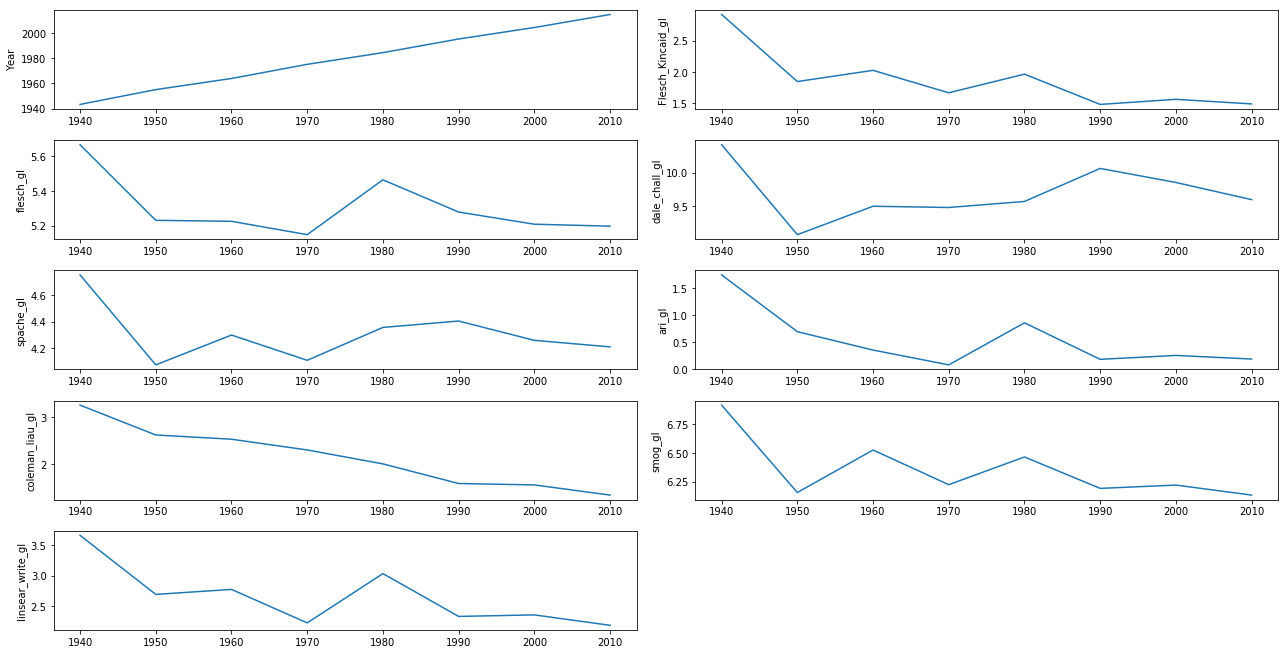

In [26]:
# plots for grade levels. Note: not normalized (non ha senso normalizzarli!)

plt.figure(figsize=(18, 18)) 
fig_dims = (10, 2)
i = 0
j = 0
for c in grade_levels_df.columns:
    plt.subplot2grid(fig_dims, (i, j))
    plt.plot(grade_levels_df[(str(c))])
    plt.ylabel(str(c))

    if (j < 1):
        j += 1
    else:
        j = 0
        i += 1
        

plt.tight_layout()
plt.show()
plt.rcParams['font.size'] = 10

In [27]:
# raggruppo per anno o per decade (come fatto per gli scores)

lex_rich_df= lexical_r.groupby('Year').mean()
#lex_rich_df= lexical_r.groupby('Decade').mean()
lex_rich_df

,Decade,num_words,num_terms,rttr,cttr,mltd
Year,,,,,,
1937,1940.000000,0.230241,0.360307,0.610133,0.610133,0.270782
1940,1940.000000,0.222320,0.370954,0.697523,0.697523,0.588194
1941,1940.000000,0.161907,0.293015,0.587524,0.587524,0.301868
1942,1940.000000,0.106064,0.188671,0.442418,0.442418,0.236408
1943,1940.000000,0.152737,0.459114,0.999601,0.999601,0.761716
...,...,...,...,...,...,...
2016,2010.000000,0.423628,0.490179,0.616703,0.616703,0.489926
2017,2010.000000,0.476400,0.569111,0.684541,0.684541,0.510576
2018,2009.285714,0.491049,0.579551,0.688610,0.688610,0.578802


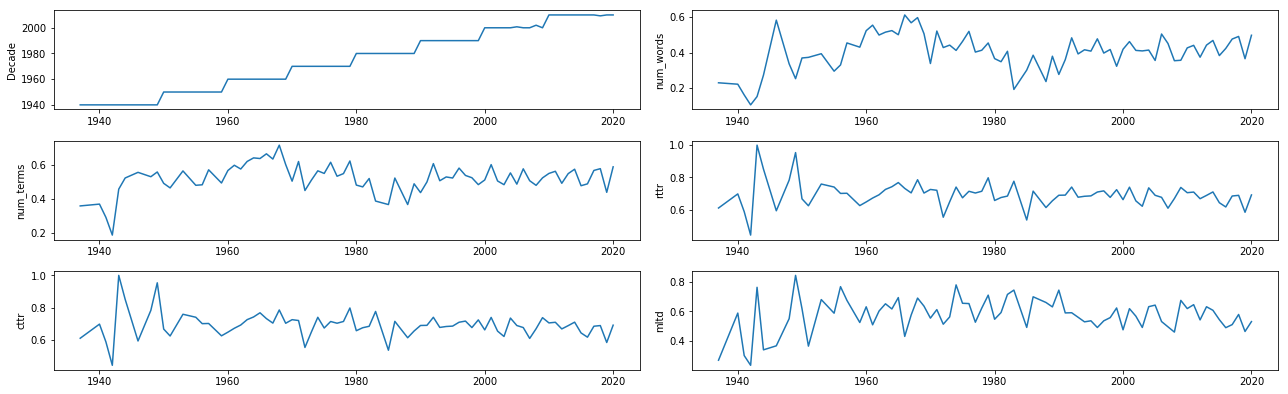

In [29]:
# plots for grade levels. Note: not normalized (non ha senso normalizzarli!)

plt.figure(figsize=(18, 18)) 
fig_dims = (10, 2)
i = 0
j = 0
for c in lex_rich_df.columns:
    plt.subplot2grid(fig_dims, (i, j))
    plt.plot(lex_rich_df[(str(c))])
    plt.ylabel(str(c))

    if (j < 1):
        j += 1
    else:
        j = 0
        i += 1
        

plt.tight_layout()
plt.show()
plt.rcParams['font.size'] = 10